In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../../')
from copy import deepcopy
import datetime
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer,
    run_trainers
)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Read Data

In [2]:
original_features_df = pd.read_csv("../../../../../data/credit_rating/intermediate_data/transformed_annual_credit_rating_features.csv")

In [3]:
dt_model = DecisionTreeClassifier()
trainer_whole = RatingModelTrainer(original_features_df, dt_model, output_type='is_investment_grade', dev_type='whole')
trainer_delta = RatingModelTrainer(original_features_df, dt_model, output_type='is_investment_grade', dev_type='delta')
trainer_mixed = RatingModelTrainer(original_features_df, dt_model, output_type='is_investment_grade', dev_type='mixed')

******************************entire test set - whole model******************************


/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Precision,Recall,F1 Score
micro,0.7393,0.7393,0.7393
macro,0.7541,0.7440,0.7375
weighted,0.7571,0.7393,0.7367


Detailed classification report:
             precision    recall  f1-score   support

      False       0.83      0.63      0.72      5567
       True       0.68      0.86      0.76      5118

avg / total       0.76      0.74      0.74     10685

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,4381,737
False,2049,3518


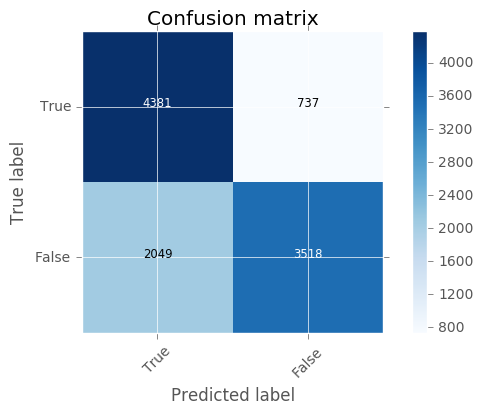

******************************entire test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.4853,0.4853,0.4853
macro,0.4840,0.4840,0.4840
weighted,0.4849,0.4853,0.4851


Detailed classification report:
             precision    recall  f1-score   support

      False       0.51      0.51      0.51      5567
       True       0.46      0.46      0.46      5118

avg / total       0.48      0.49      0.49     10685

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,2329,2789
False,2711,2856


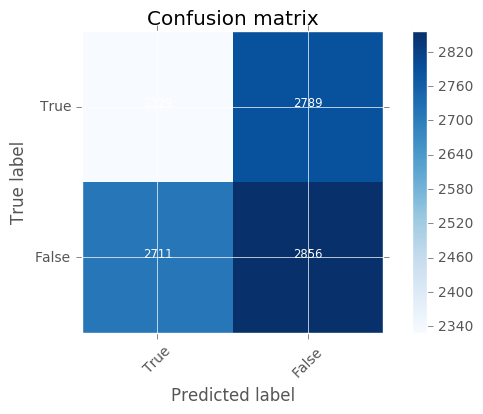

******************************entire test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.6598,0.6598,0.6598
macro,0.6644,0.6625,0.6593
weighted,0.6661,0.6598,0.6588


Detailed classification report:
             precision    recall  f1-score   support

      False       0.70      0.60      0.65      5567
       True       0.62      0.73      0.67      5118

avg / total       0.67      0.66      0.66     10685

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,3720,1398
False,2237,3330


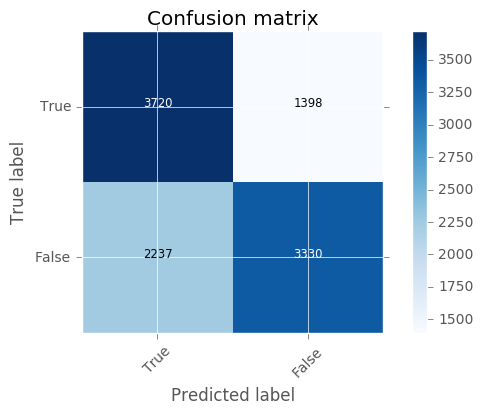

******************************delta test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.0406,0.0406,0.0406
macro,0.0405,0.0602,0.0403
weighted,0.0405,0.0406,0.0323


Detailed classification report:
             precision    recall  f1-score   support

      False       0.04      0.01      0.02      2080
       True       0.04      0.11      0.06       824

avg / total       0.04      0.04      0.03      2904

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,87,737
False,2049,31


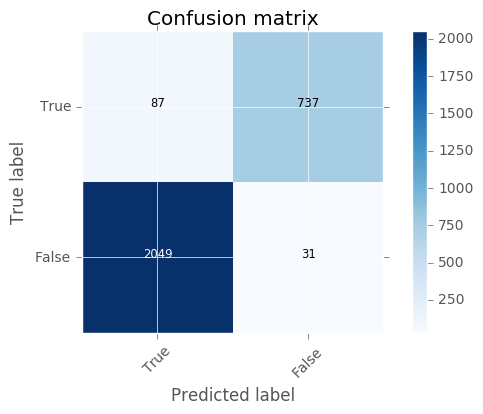

******************************delta test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.0271,0.0271,0.0271
macro,0.0270,0.0271,0.0271
weighted,0.0270,0.0271,0.0270


Detailed classification report:
             precision    recall  f1-score   support

      False       0.03      0.03      0.03      2794
       True       0.03      0.02      0.02      2859

avg / total       0.03      0.03      0.03      5653

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,70,2789
False,2711,83


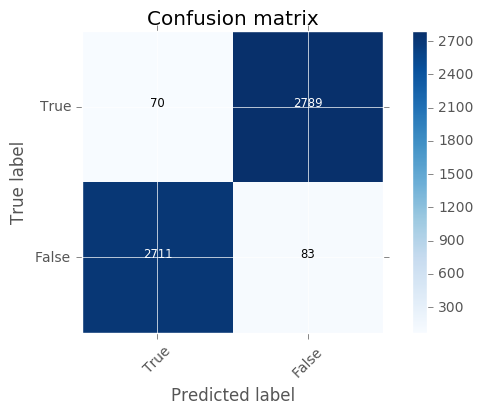

******************************delta test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.0373,0.0373,0.0373
macro,0.0382,0.0403,0.0373
weighted,0.0390,0.0373,0.0363


Detailed classification report:
             precision    recall  f1-score   support

      False       0.04      0.03      0.03      2298
       True       0.03      0.05      0.04      1478

avg / total       0.04      0.04      0.04      3776

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,80,1398
False,2237,61


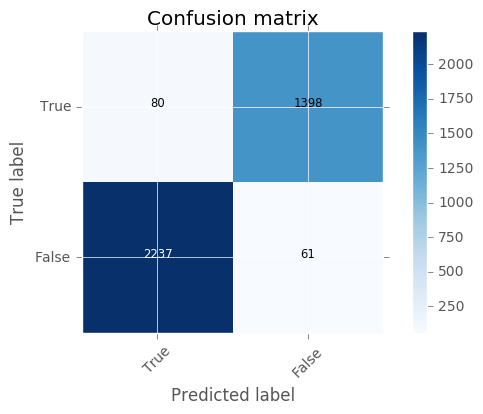

In [4]:
run_trainers([trainer_whole, trainer_delta, trainer_mixed], ["whole", "delta", "mixed"])

In [5]:
dt_model_balanced = DecisionTreeClassifier(class_weight='balanced')
trainer_whole_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='is_investment_grade', dev_type='whole')
trainer_delta_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='is_investment_grade', dev_type='delta')
trainer_mixed_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='is_investment_grade', dev_type='mixed')

******************************entire test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.7455,0.7455,0.7455
macro,0.7590,0.7500,0.7441
weighted,0.7620,0.7455,0.7433


Detailed classification report:
             precision    recall  f1-score   support

      False       0.83      0.64      0.72      5567
       True       0.69      0.86      0.76      5118

avg / total       0.76      0.75      0.74     10685

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,4382,736
False,1983,3584


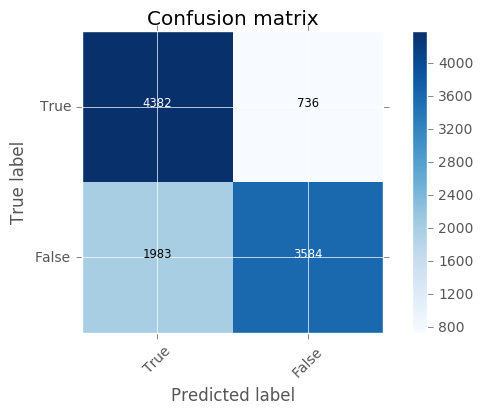

******************************entire test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.4985,0.4985,0.4985
macro,0.4960,0.4961,0.4953
weighted,0.4969,0.4985,0.4970


Detailed classification report:
             precision    recall  f1-score   support

      False       0.52      0.56      0.54      5567
       True       0.47      0.44      0.45      5118

avg / total       0.50      0.50      0.50     10685

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,2236,2882
False,2476,3091


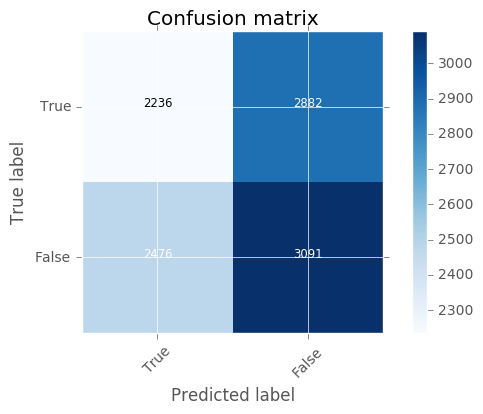

******************************entire test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.6705,0.6705,0.6705
macro,0.6753,0.6732,0.6700
weighted,0.6770,0.6705,0.6695


Detailed classification report:
             precision    recall  f1-score   support

      False       0.72      0.61      0.66      5567
       True       0.63      0.74      0.68      5118

avg / total       0.68      0.67      0.67     10685

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,3780,1338
False,2183,3384


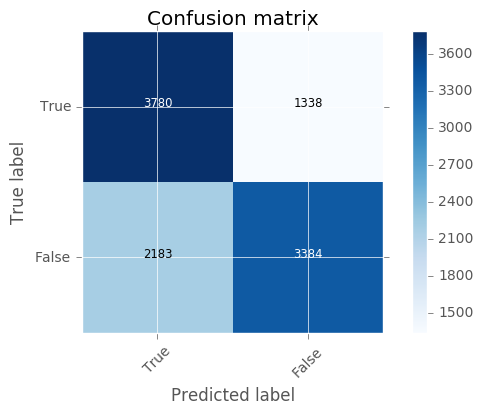

******************************delta test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.0456,0.0456,0.0456
macro,0.0463,0.0653,0.0453
weighted,0.0470,0.0456,0.0374


Detailed classification report:
             precision    recall  f1-score   support

      False       0.05      0.02      0.03      2020
       True       0.04      0.11      0.06       829

avg / total       0.05      0.05      0.04      2849

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,93,736
False,1983,37


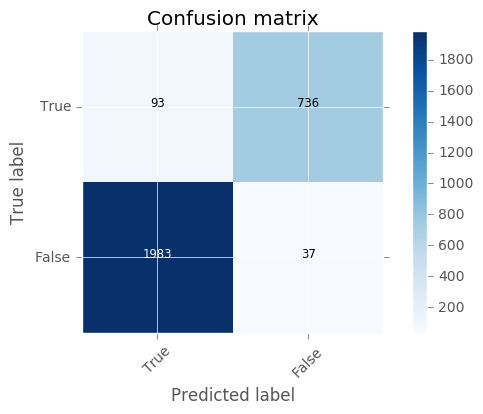

******************************delta test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.0274,0.0274,0.0274
macro,0.0272,0.0279,0.0274
weighted,0.0271,0.0274,0.0271


Detailed classification report:
             precision    recall  f1-score   support

      False       0.03      0.03      0.03      2564
       True       0.02      0.02      0.02      2945

avg / total       0.03      0.03      0.03      5509

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,63,2882
False,2476,88


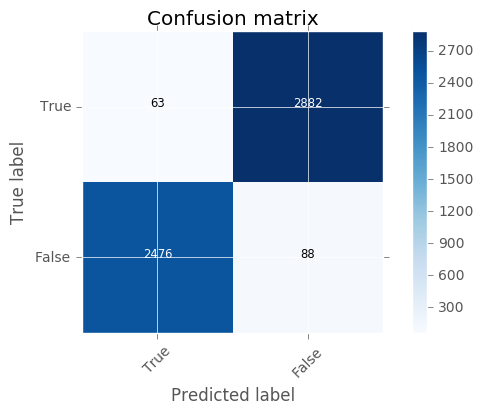

******************************delta test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.0385,0.0385,0.0385
macro,0.0395,0.0418,0.0385
weighted,0.0404,0.0385,0.0374


Detailed classification report:
             precision    recall  f1-score   support

      False       0.04      0.03      0.03      2244
       True       0.04      0.06      0.04      1418

avg / total       0.04      0.04      0.04      3662

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,80,1338
False,2183,61


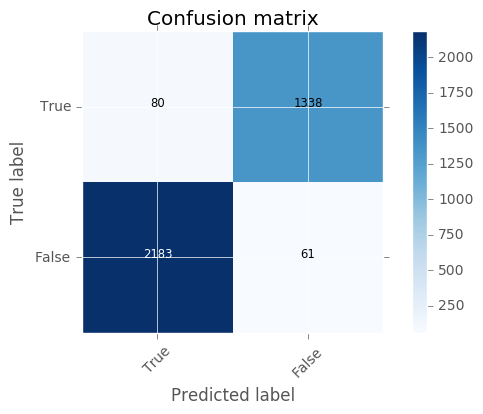

In [6]:
run_trainers([trainer_whole_balanced, trainer_delta_balanced, trainer_mixed_balanced], ["whole", "delta", "mixed"])